### Task 1

ResNet50

Image1: 98%
Image2: 94%
Image3: 98%
Image4: 97%
Image5: 98%

In [ ]:
# ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'images/crane5.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

VGG16

Image1: 80%
Image2: 84%
Image3: 42%
Image4: 77%
Image5: 39%

In [ ]:
# VGG16

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet')

img_path = 'images/crane5.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [ ]:
print('Predicted:', decode_predictions(features, top=3)[0])

VGG19

Image1: 81% 
Image2: 66%
Image3: 59%
Image4: 77%
Image5: 46%

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'images/crane5.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = base_model.predict(x)

In [ ]:
print('Predicted:', decode_predictions(block4_pool_features, top=3)[0])

### Task 2

In [2]:
import splitfolders

# Split with a ratio.
splitfolders.ratio("input", output="output", seed=1337, ratio=(.8, .2), group_prefix=None, move=False)


Copying files: 0 files [00:00, ? files/s]
Copying files: 36 files [00:00, 346.13 files/s]
Copying files: 97 files [00:00, 487.54 files/s]
Copying files: 146 files [00:00, 355.17 files/s]
Copying files: 185 files [00:01, 69.61 files/s] 
Copying files: 210 files [00:02, 51.22 files/s]
Copying files: 227 files [00:03, 42.25 files/s]
Copying files: 239 files [00:04, 35.88 files/s]
Copying files: 248 files [00:04, 32.77 files/s]
Copying files: 255 files [00:04, 31.03 files/s]
Copying files: 261 files [00:05, 28.68 files/s]
Copying files: 266 files [00:05, 28.66 files/s]
Copying files: 270 files [00:05, 27.99 files/s]
Copying files: 274 files [00:05, 27.95 files/s]
Copying files: 278 files [00:05, 26.35 files/s]
Copying files: 282 files [00:05, 27.26 files/s]
Copying files: 288 files [00:06, 47.08 files/s]


Found 144 images belonging to 2 classes.
len:  2


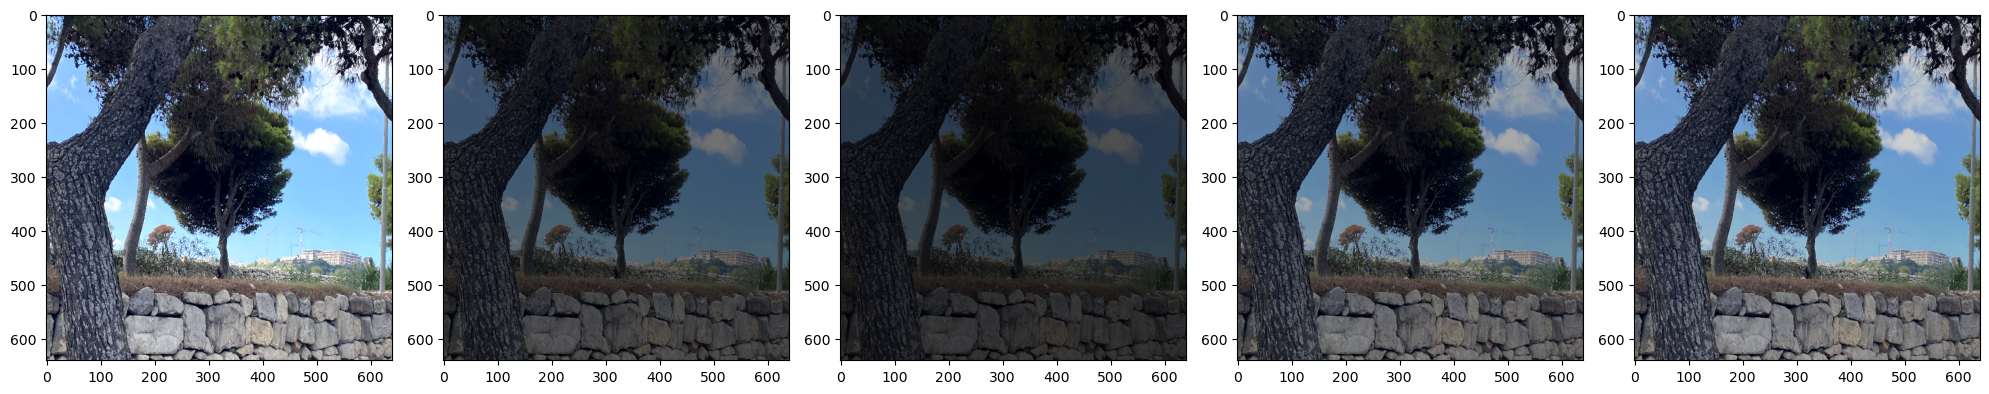

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

train_dir = os.path.dirname('output/train')

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

image_gen_train = ImageDataGenerator(
    brightness_range = [0.3, 1.2],
    rescale = 1./255,
    fill_mode = 'nearest')

img_size = 640

train_data_gen = image_gen_train.flow_from_directory(batch_size=115,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_size,img_size),
                                                     class_mode='binary')

print("len: ", len(train_data_gen))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow as tf
import numpy as np

!pip install -r ./yolov7/requirements.txt
!pip install -r ./yolov7/requirements_gpu.txt

     -------------------------------------- 162.5/162.5 MB 4.6 MB/s eta 0:00:00


Looking in indexes: https://download.pytorch.org/whl/cu113
     ---------------------------------------- 2.2/2.2 GB 432.2 kB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1


In [43]:
!python yolov7/train.py --workers 1 --device 0 --batch-size 4 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

Traceback (most recent call last):
  File "C:\Users\lldam\OneDrive\UOM\3rd Year\Advanced Computer Vision\advancedcv_task\yolov7\train.py", line 595, in <module>
    device = select_device(opt.device, batch_size=opt.batch_size)
  File "C:\Users\lldam\OneDrive\UOM\3rd Year\Advanced Computer Vision\advancedcv_task\yolov7\utils\torch_utils.py", line 71, in select_device
    assert torch.cuda.is_available(), f'CUDA unavailable, invalid device {device} requested'  # check availability
AssertionError: CUDA unavailable, invalid device 0 requested
